# Inspector

Inspecting the generated ASTs.

In [1]:
import sys

In [2]:
sys.version

'3.5.2 (default, Nov 23 2017, 16:37:01) \n[GCC 5.4.0 20160609]'

In [3]:
import csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import json
import os
import joblib
from operator import itemgetter
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.colors as mcolors
import collections
from collections import Counter

from networkx.algorithms.traversal.depth_first_search import dfs_tree


In [5]:
#DATA_PATH = '../magret/cls_magret/data/'
#DATA_PATH = 'data/bert-example/graph/train/'
DATA_PATH = 'data/keras-example/graph/train/'

In [6]:
PREFIX = 'keras'

## Load data

### Features

In [7]:
feats = np.load(DATA_PATH+PREFIX+'-feats.npy')
feats.shape

(101632, 104)

### Classes

In [8]:
class_map = json.load(open(DATA_PATH+PREFIX+"-class_map.json"))

### Graph

In [9]:
G_data = json.load(open(DATA_PATH+PREFIX+ "-G.json"))
G = json_graph.node_link_graph(G_data)
print(G.number_of_nodes(), G.number_of_edges())


101632 106362


In [10]:
# Node degree
sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes())

2.093080919395466

### Node id map

In [11]:
node_id_map = json.load(open(DATA_PATH+PREFIX+"-id_map.json"))

### File map

In [12]:
file_map = json.load(open(DATA_PATH+PREFIX+"-file_map.json"))

### Source-code line map

In [13]:
source_map = json.load(open(DATA_PATH+PREFIX+"-source_map.json"))

### Func map

In [14]:
func_map = json.load(open(DATA_PATH+PREFIX+"-func_map.json"))

## Var map

In [15]:
var_map = json.load(open(DATA_PATH+PREFIX+"-var_map.json"))

### AST Token maps

In [16]:
#ast_symbol_dict = joblib.load(filename='ast_symbol_dict')
inv_ast_symbol_dict = joblib.load(filename='inv_ast_symbol_dict')

AttributeError: module '_ast' has no attribute 'FormattedValue'

In [17]:
from _ast import *
import sys

MOD_SYMBOLS = [Module, Interactive, Expression, Suite]
STMT_SYMBOLS = [FunctionDef, AsyncFunctionDef, ClassDef, Return, Delete, \
                Assign, AugAssign, For, AsyncFor, While, If, With, AsyncWith, \
                Raise, Try, Assert, Import, ImportFrom, Global, Nonlocal, \
                Expr, Pass, Break, Continue]
EXPR_SYMBOLS = [BoolOp, BinOp, UnaryOp, Lambda, IfExp, Dict, Set, ListComp, \
                SetComp, DictComp, GeneratorExp, Await, Yield, YieldFrom, \
                Compare, Call, Num, Str, FormattedValue, JoinedStr, Bytes, \
                NameConstant, Ellipsis, Constant, Attribute, Subscript, \
                Starred, Name, List, Tuple]
EXPR_CONTENT_SYMBOLS = [Load, Store, Del, AugLoad, AugStore, Param]
SLICE_SYMBOLS = [Slice, ExtSlice, Index]
BOOLOP_SYMBOLS = [And, Or]
OPERATOR_SYMBOLS = [Add, Sub, Mult, MatMult, Div, Mod, Pow, LShift, RShift, \
                    BitOr, BitXor, BitAnd, FloorDiv]
UNARYOP_SYMBOLS = [Invert, Not, UAdd, USub]
CMPOP_SYMBOLS = [Eq, NotEq, Lt, LtE, Gt, GtE, Is, IsNot, In, NotIn]
COMPREHENSION_SYMBOLS = [comprehension]
EXCEPT_SYMBOLS = [excepthandler, ExceptHandler]
ARG_SYMBOLS = [arguments, arg, keyword]
IMPORT_SYMBOLS = [alias, withitem]
PYTHON_SYMBOLS = MOD_SYMBOLS + STMT_SYMBOLS + EXPR_SYMBOLS \
               + EXPR_CONTENT_SYMBOLS + SLICE_SYMBOLS \
               + BOOLOP_SYMBOLS + OPERATOR_SYMBOLS \
               + UNARYOP_SYMBOLS + CMPOP_SYMBOLS \
               + EXCEPT_SYMBOLS + ARG_SYMBOLS + IMPORT_SYMBOLS \
               + COMPREHENSION_SYMBOLS
AST_SYMBOL_DICT = dict((v, k) for (k, v) in enumerate(PYTHON_SYMBOLS))

NameError: name 'FormattedValue' is not defined

In [163]:
AST_SYMBOL_DICT

{_ast.Module: 0,
 _ast.Interactive: 1,
 _ast.Expression: 2,
 _ast.Suite: 3,
 _ast.FunctionDef: 4,
 _ast.AsyncFunctionDef: 5,
 _ast.ClassDef: 6,
 _ast.Return: 7,
 _ast.Delete: 8,
 _ast.Assign: 9,
 _ast.AugAssign: 10,
 _ast.For: 11,
 _ast.AsyncFor: 12,
 _ast.While: 13,
 _ast.If: 14,
 _ast.With: 15,
 _ast.AsyncWith: 16,
 _ast.Raise: 17,
 _ast.Try: 18,
 _ast.Assert: 19,
 _ast.Import: 20,
 _ast.ImportFrom: 21,
 _ast.Global: 22,
 _ast.Nonlocal: 23,
 _ast.Expr: 24,
 _ast.Pass: 25,
 _ast.Break: 26,
 _ast.Continue: 27,
 _ast.BoolOp: 28,
 _ast.BinOp: 29,
 _ast.UnaryOp: 30,
 _ast.Lambda: 31,
 _ast.IfExp: 32,
 _ast.Dict: 33,
 _ast.Set: 34,
 _ast.ListComp: 35,
 _ast.SetComp: 36,
 _ast.DictComp: 37,
 _ast.GeneratorExp: 38,
 _ast.Await: 39,
 _ast.Yield: 40,
 _ast.YieldFrom: 41,
 _ast.Compare: 42,
 _ast.Call: 43,
 _ast.Num: 44,
 _ast.Str: 45,
 _ast.FormattedValue: 46,
 _ast.JoinedStr: 47,
 _ast.Bytes: 48,
 _ast.NameConstant: 49,
 _ast.Ellipsis: 50,
 _ast.Constant: 51,
 _ast.Attribute: 52,
 _ast.Subscr

---

## Helpers

In [164]:
def get_name_from_token(token, show_id=True):
    tokenid  = np.nonzero(token)[0][0]
    return get_name_from_token_id(tokenid, show_id=show_id)

In [165]:
def get_name_from_token_id(tokenid, show_id = True):
    strtoken = inv_ast_symbol_dict.get(tokenid)
    
    if strtoken is None:
        if tokenid == 104:
            strtoken = "Root Node"
        else:
            strtoken = "<Unknown token>"
    else:
        strtoken = strtoken.__name__
        
    if show_id is True:
        strtoken += " " + str(tokenid) 
        
    return strtoken

In [166]:
def inspect_node_recursive(node_id, G, feats, depth=0):
    '''
    Recursively print neighbouring node tokens
    '''
    neighbours = list(G.adj[node_id])
    for n in neighbours:
        strtoken = get_name_from_token(feats[n])
        if strtoken=="Root Node 104":
            print(n)
        print(" "*depth, strtoken)
        if depth < 2:
            inspect_node_recursive(n, G, feats, depth+1)

In [167]:
# Example usage
inspect_node_recursive(0, G=G, feats=feats)

 Expr 24
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Impor

   If 14
  FunctionDef 4
   arguments 98
   Expr 24
   If 14
  alias 101
 ImportFrom 21
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   ImportFrom 21
   Try 18
   FunctionDef 4
   FunctionDef 4
   FunctionDef 4
   alias 101
  ImportFrom 21
   ImportFrom 21
   I

In [168]:
def draw_egonet(node_id=1009, radius=2):
    hub_ego = nx.ego_graph(G, node_id, radius=radius)
    # Draw graph
    pos = nx.spring_layout(hub_ego)

    neighbours = list(hub_ego.nodes())
    labels = {}
    for n in neighbours:
        labels[n] = get_name_from_token(feats[n], show_id=False)

    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
    plt.show()
    return neighbours

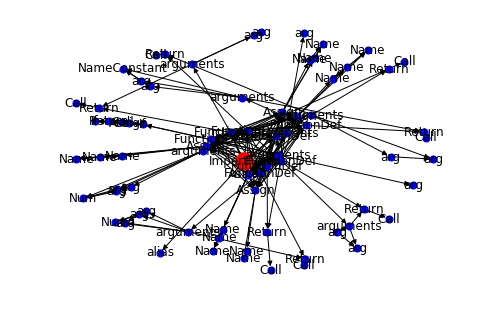

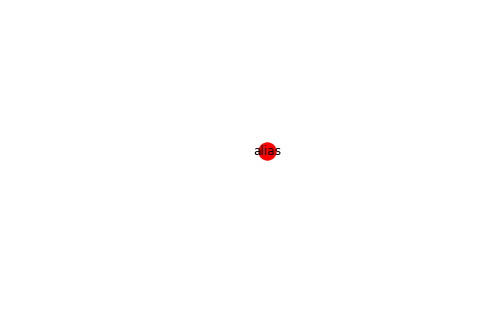

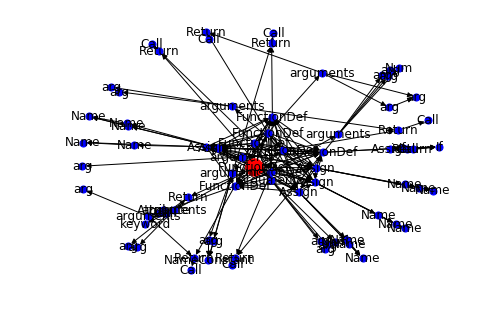

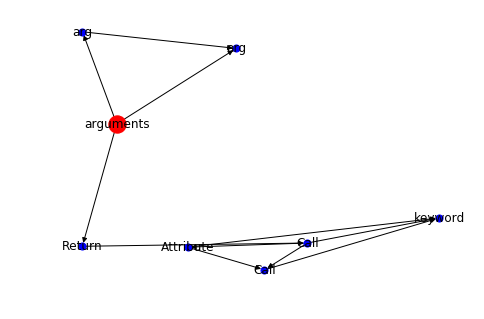

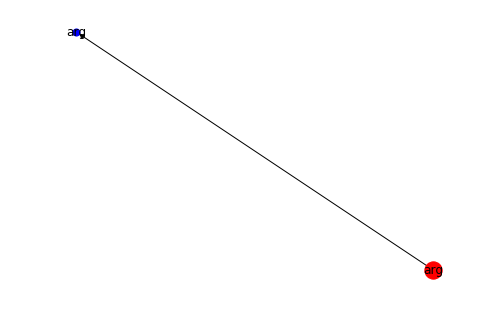

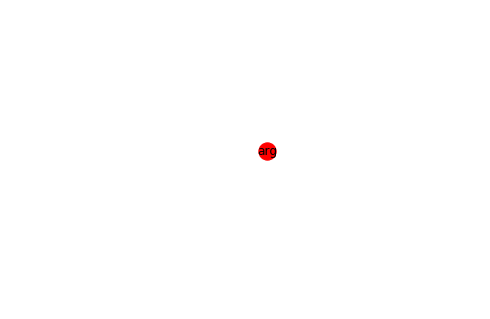

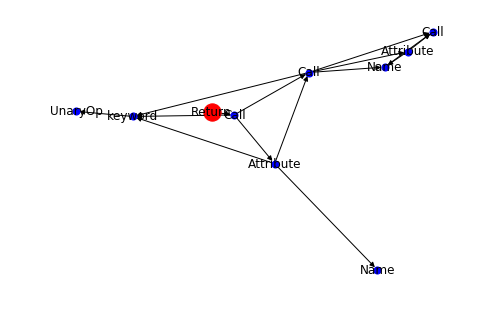

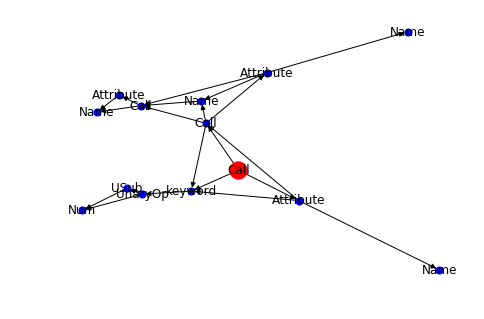

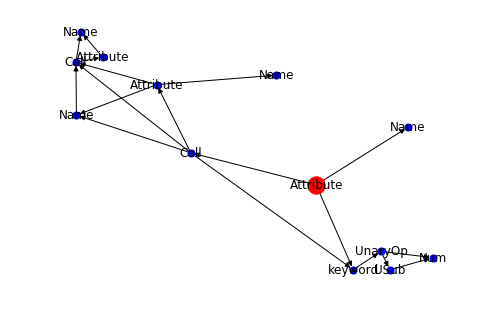

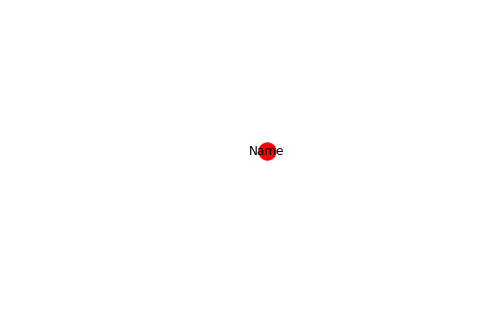

In [169]:
# Example usage 
for i in range(1000, 1010):
    draw_egonet(i, radius=3)

In [170]:
get_name_from_token_id(54982)

'<Unknown token> 54982'

In [171]:
example_root_node_id = 1647

In [172]:
get_name_from_token(feats[example_root_node_id])

'FunctionDef 4'

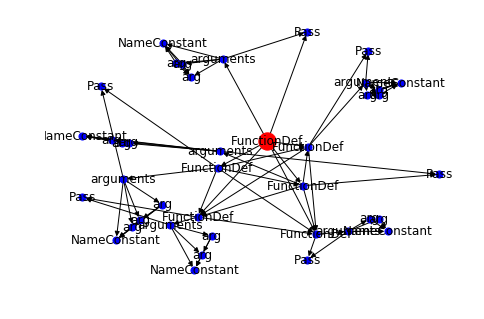

In [173]:
n = draw_egonet(example_root_node_id, radius=6)

In [174]:
def draw_subtree(G, node_id=1009):
    hub_ego = dfs_tree(G, node_id)
    # Draw graph
    pos = nx.spring_layout(hub_ego)

    neighbours = list(hub_ego.nodes())
    if len(neighbours) > 100:
        return
    labels = {}
    for n in neighbours:
        labels[n] = get_name_from_token(feats[n], show_id=False)

    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
    plt.show()
    return neighbours

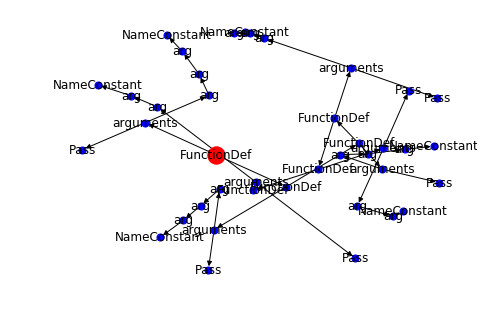

In [175]:
neighs = draw_subtree(G, example_root_node_id)

In [99]:
len(neighs), len(n)

(7, 7)

In [84]:
if G.number_of_nodes() < 100:
    labels = {}
    for n in G.nodes():
        labels[n] = get_name_from_token(feats[n], show_id=False)
    pos = nx.layout.kamada_kawai_layout(G)
    nx.draw(G, pos, node_color='g', node_size=250, with_labels=True, labels=labels)

In [31]:
def get_code_token(node_id):
    top_node, lineno, col_offset = source_map[str(node_id)]
    
    print("node_id =",node_id, "; top_node =",top_node)
    print("token_type =", get_name_from_token(feats[G.nodes()][node_id], show_id=False))


    ast_filename = file_map[str(top_node)]
    source_filename = parse_map[ast_filename]
    
    print()
    
    with open(source_filename[3:]) as f:
        for i, line in enumerate(f):
            if i+1 == lineno:
                print("Line", lineno, ":") 
                print("`", line.strip('\n'),"`")
                if col_offset != -1:
                    l = 0
                    for ls in line.split(): 
                        l += len(ls)
                        if l > col_offset:
                            print("\nToken =",ls)
                            break

In [32]:
get_code_token(1)

node_id = 1 ; top_node = 0
token_type = Expr


NameError: name 'parse_map' is not defined

---

## Graph analysis

In [149]:
def draw_color_graph(G, measure):
    plt.figure(figsize=(15,15))
    pos = nx.layout.kamada_kawai_layout(G)
    labels = {}
    for n in G.nodes():
        labels[n] = get_name_from_token(feats[n], show_id=False)
    measures = color_list = [v for v in measure(G).values()]
    measure_name = measure.__name__
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.plasma, 
                                   node_color=measures,
                                   nodelist=G.nodes())
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    
    pos_labels = {}
    x_off, y_off = 0.05, 0.05

    for k, v in pos.items():
        pos_labels[k] = (v[0]+x_off, v[1]+y_off)
    
    nx.draw_networkx_labels(G,pos_labels,labels,font_size=16)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

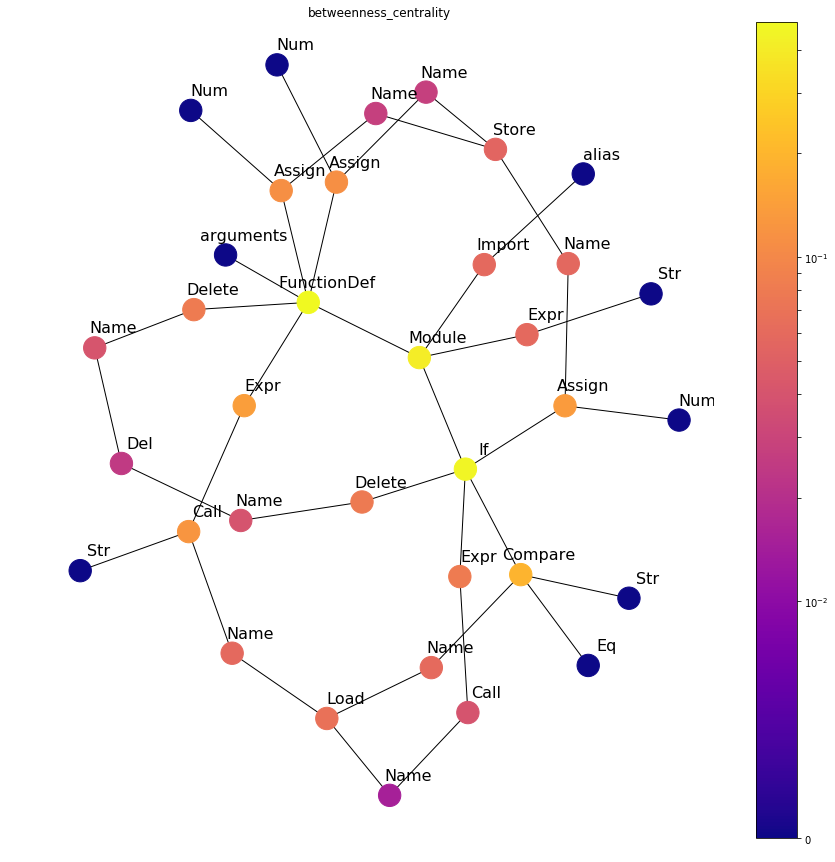

In [150]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.betweenness_centrality)

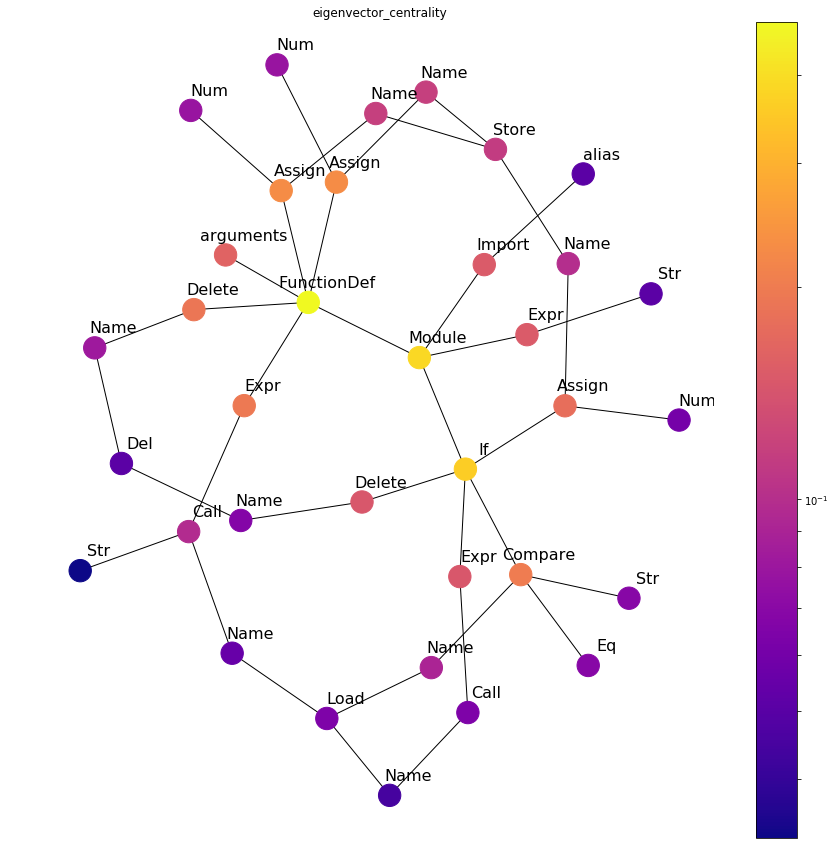

In [151]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.eigenvector_centrality)

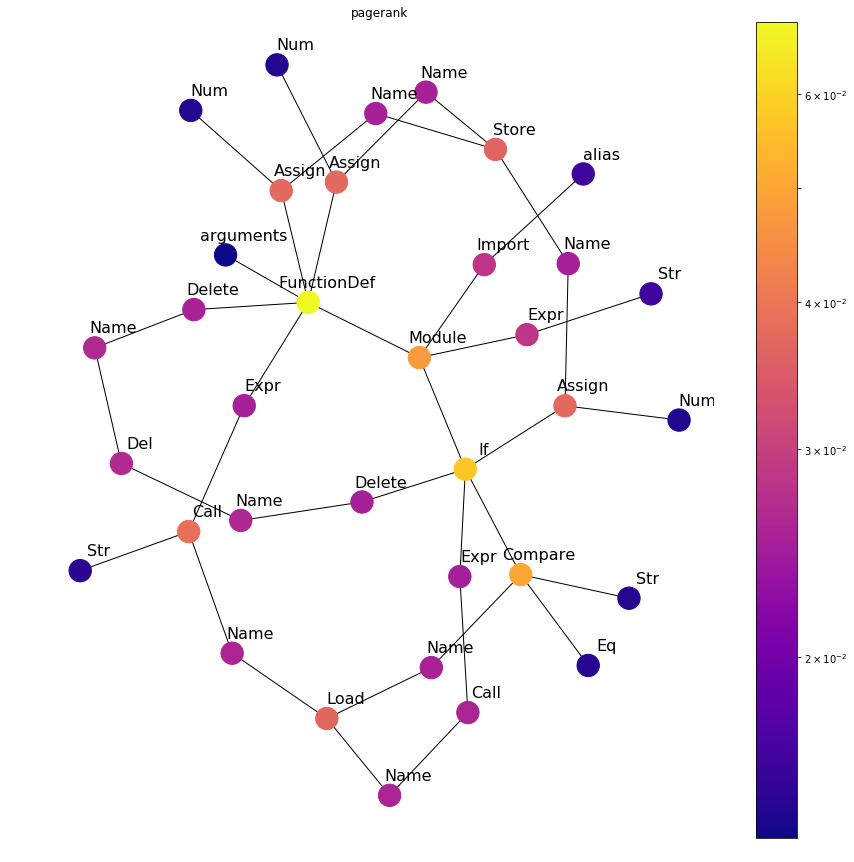

In [152]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.pagerank)

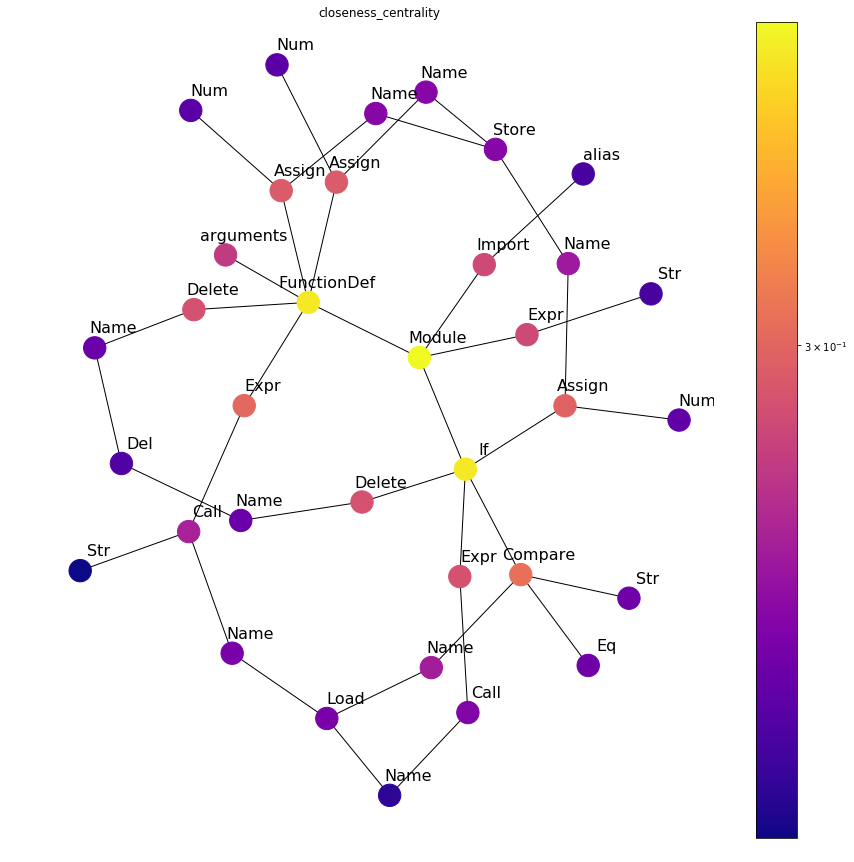

In [153]:
if G.number_of_nodes() < 100:
    draw_color_graph(G, nx.closeness_centrality)

---

## Graph Metrics

### Node degree distribution

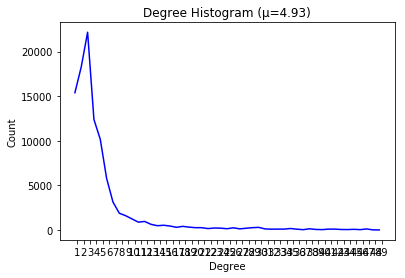

In [174]:
degree_sequence = sorted([d for n, d in G.degree() if d < 50], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

mean_degree = sum(degree_sequence)/G.number_of_nodes()


fig, ax = plt.subplots()
plt.plot(deg, cnt, color='b')

plt.title("Degree Histogram (µ="+"{:.2f}".format(mean_degree)+")")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [175]:
degreeCount

Counter({49: 6,
         48: 11,
         47: 114,
         46: 38,
         45: 72,
         44: 47,
         43: 54,
         42: 96,
         41: 94,
         40: 41,
         39: 59,
         38: 133,
         37: 36,
         36: 87,
         35: 163,
         34: 97,
         33: 97,
         32: 90,
         31: 116,
         30: 289,
         29: 259,
         28: 192,
         27: 125,
         26: 243,
         25: 140,
         24: 201,
         23: 220,
         22: 156,
         21: 256,
         20: 258,
         19: 318,
         18: 405,
         17: 300,
         16: 442,
         15: 529,
         14: 477,
         13: 632,
         12: 955,
         11: 878,
         10: 1237,
         9: 1600,
         8: 1876,
         7: 3133,
         6: 5781,
         5: 10160,
         4: 12384,
         3: 22165,
         2: 18288,
         1: 15386})

### Diameter

In [176]:
diams = nx.diameter(G)

KeyboardInterrupt: 

### Eccentricity

In [122]:
ecc_count = collections.Counter(nx.eccentricity(G).values())
deg, cnt = zip(*ecc_count.items())

mean_ecc = sum(nx.eccentricity(G).values())/G.number_of_nodes()

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Eccentricity Histogram (µ="+"{:.2f}".format(mean_ecc)+")")
plt.ylabel("Count")
plt.xlabel("Eccentricity")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

KeyboardInterrupt: 

## Graph subsampling

In [177]:
G_filt = nx.Graph()
G_filt.add_nodes_from([n for n, d in G.degree() if d < 50])

In [178]:
G_filt.add_edges_from([edge for edge in G.edges if ((edge[0] in G_filt.nodes) and (edge[1] in G_filt.nodes))])

In [179]:
G_filt.number_of_nodes(), G_filt.number_of_edges()

(100736, 243786)

In [180]:
G.number_of_nodes(), G.number_of_edges()

(101632, 317327)

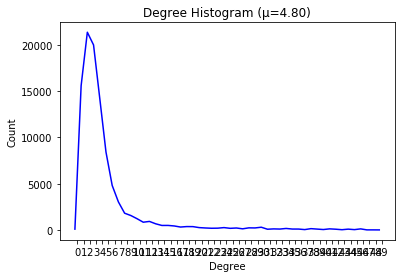

In [181]:
degree_sequence = sorted([d for n, d in G_filt.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

mean_degree = sum(degree_sequence)/G.number_of_nodes()


fig, ax = plt.subplots()
plt.plot(deg, cnt, color='b')

plt.title("Degree Histogram (µ="+"{:.2f}".format(mean_degree)+")")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

## Feature distribution

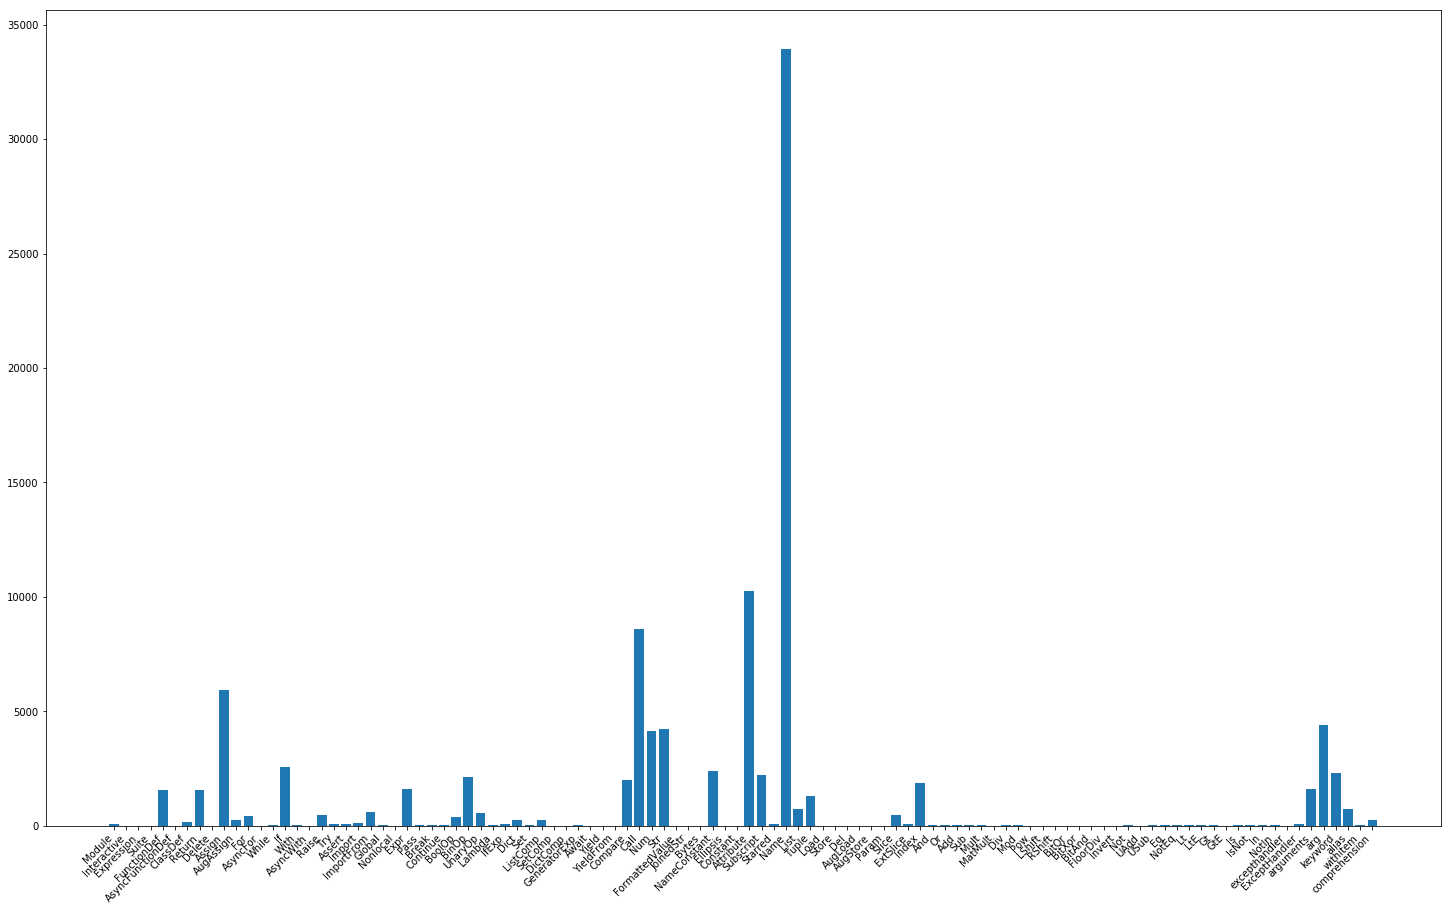

In [128]:
plt.figure(figsize=(25,15))
plt.bar(range(104),feats.sum(axis=0));
plt.xticks(range(104),[_.__name__ for _ in PYTHON_SYMBOLS],rotation=45, ha="right");

In [129]:
from collections import Counter

classes = [0]*14
for k,v in class_map.items():
    classes[v] += class_map[k]

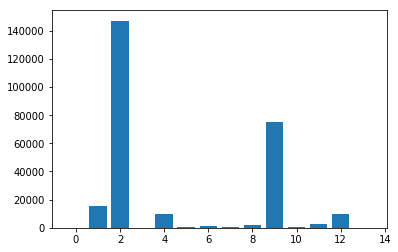

In [130]:
plt.bar(range(14),classes);

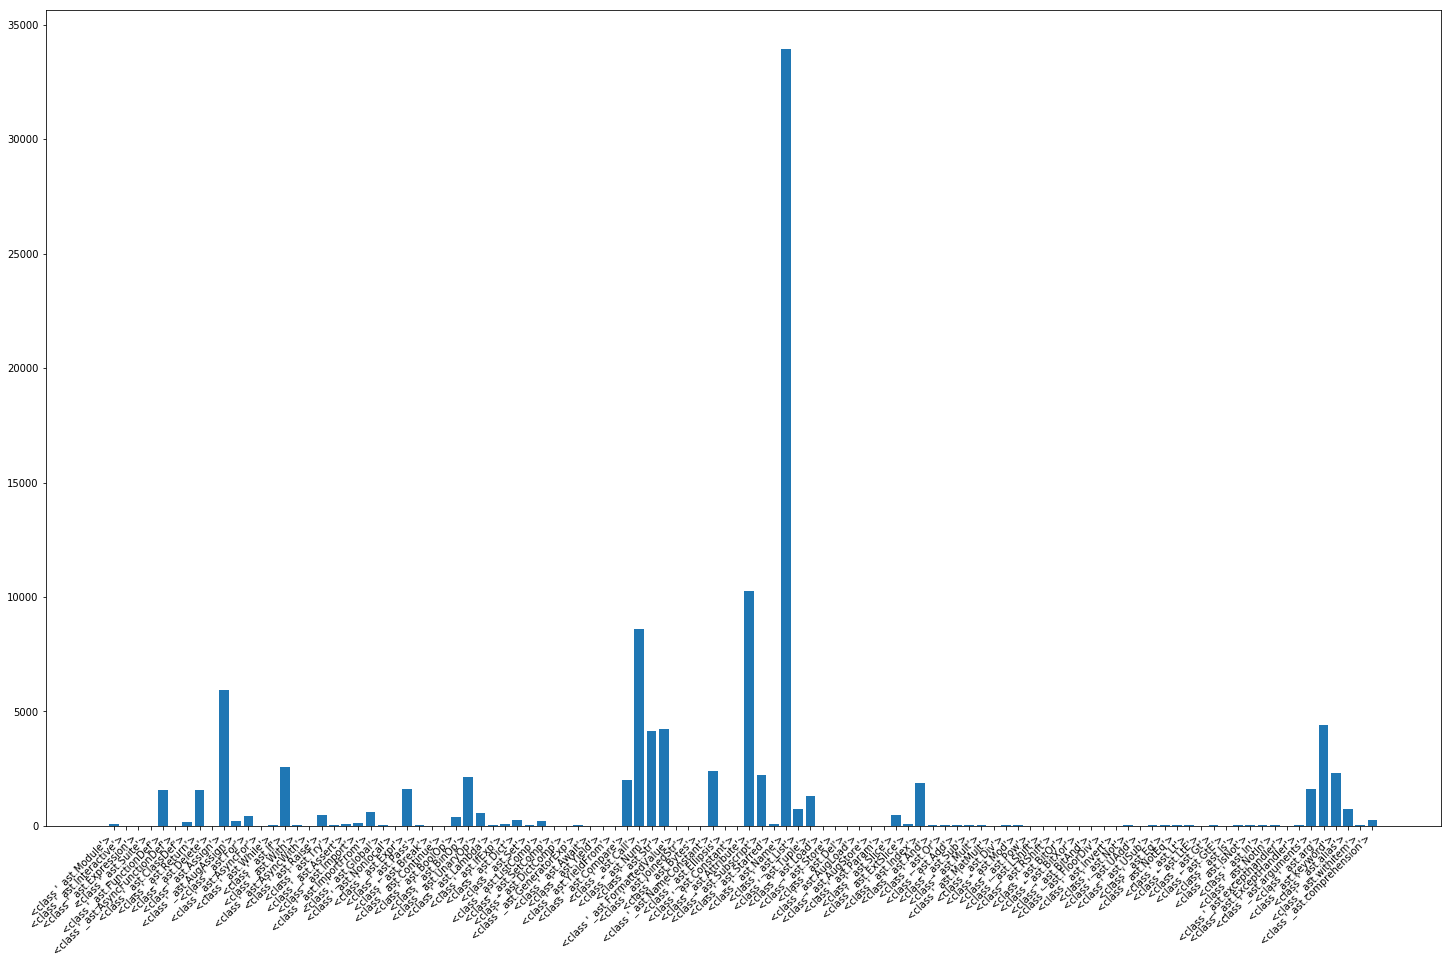

In [131]:
plt.figure(figsize=(25,15))
plt.bar(range(104),feats.sum(axis=0));
plt.xticks(range(104),PYTHON_SYMBOLS,rotation=45, ha="right");

## Function Trees

Generate function definition trees.

In [31]:
def gen_func_def_trees(G, func_map):
    func_node_map = {}
    for k,v in func_map.items():
        func_node_map[str(k)] = list(dfs_tree(G, int(k)).nodes())
        
    with open(DATA_PATH+PREFIX+'-func_node_map.json', 'w') as fout:
        fout.write(json.dumps(func_node_map))
        print("Saved", fout.name)

In [32]:
gen_func_def_trees(G, func_map)

Saved data/keras-example/graph/train/keras-func_node_map.json


In [33]:
def gen_function_trees():
    func_tree = {}
    for k,v in func_map.items():
        hub_ego = dfs_tree(G, int(k))
        neighbours = list(hub_ego.nodes())
        if len(neighbours) < 64:
            func_tree[k] = neighbours
    return func_tree

## Adjacency

In [34]:
func_tree = gen_function_trees()

In [38]:
with open('function_adj.txt', 'w', newline='') as f:
    wr = csv.writer(f)
    G_u = G.to_undirected()
    idx = 0
    for k,vs in func_tree.items():
        if idx > 900:
            break
        else:
            idx += 1
        adj = nx.adj_matrix(G_u.subgraph(vs)).todense()
        final = np.zeros((64,64), dtype=int)
        final[:adj.shape[0], :adj.shape[1]] = adj
        final += np.eye(64, dtype=int)
        for row in final.tolist():
            wr.writerow(row)
        wr.writerow([])
        wr.writerow([])

In [39]:
with open('function_adj_val.txt', 'w', newline='') as f:
    wr = csv.writer(f)
    G_u = G.to_undirected()
    idx = 0
    for k,vs in func_tree.items():
        if idx < 900:
            idx += 1
            continue
        adj = nx.adj_matrix(G_u.subgraph(vs)).todense()
        final = np.zeros((64,64), dtype=int)
        final[:adj.shape[0], :adj.shape[1]] = adj
        final += np.eye(64, dtype=int)
        for row in final.tolist():
            wr.writerow(row)
        wr.writerow([])
        wr.writerow([])

In [40]:
voc = []
for k,vs in func_tree.items():
    tokens = list(set([get_name_from_token(feats[v], show_id=False) for v in vs]))
    for t in tokens:
        if t not in voc:
            voc.append(t)

In [41]:
for v in voc:
    print(v.lower())

attribute
arg
name
arguments
functiondef
return
call
keyword
nameconstant
if
expr
str
num
assign
binop
mult
raise
compare
is
unaryop
usub
dict
listcomp
comprehension
or
boolop
list
for
pass
div
index
in
subscript
isnot
mod
eq
add
tuple
lt
ifexp
and
gt
continue
noteq
gte
augassign
sub
withitem
not
with
set
notin
assert
starred
alias
importfrom
slice
while
try
excepthandler
yield
break
lambda
bytes
generatorexp
global
floordiv
import
lte
extslice


In [37]:
with open('function_adj_fc.txt', 'w', newline='') as f:
    wr = csv.writer(f)
    G_u = G.to_undirected()
    idx = 0
    for k,vs in func_tree.items():
        if idx > 900:
            break
        else:
            idx += 1
        final = np.ones((64,64), dtype=int)
        for row in final.tolist():
            wr.writerow(row)
        wr.writerow([])
        wr.writerow([])

In [38]:
with open('function_adj_val_fc.txt', 'w', newline='') as f:
    wr = csv.writer(f)
    G_u = G.to_undirected()
    idx = 0
    for k,vs in func_tree.items():
        if idx < 900:
            idx += 1
            continue
        final = np.ones((64,64), dtype=int)
        for row in final.tolist():
            wr.writerow(row)
        wr.writerow([])
        wr.writerow([])

## Tokens

In [55]:
with open('function_tk.txt', 'w') as f:
    idx = 0
    for k,vs in func_tree.items():
        if idx > 900:
            break
        else:
            idx += 1
        row = [get_name_from_token(feats[v], show_id=False) for v in vs]
        f.write(' '.join(row))
        f.write('\n\n')

In [56]:
with open('function_tk_val.txt', 'w') as f:
    idx = 0
    for k,vs in func_tree.items():
        if idx < 900:
            idx += 1
            continue
        row = [get_name_from_token(feats[v], show_id=False) for v in vs]
        f.write(' '.join(row))
        f.write('\n\n')

In [57]:
with open('function_tk_literal.txt', 'w') as f:
    idx = 0
    for k,vs in func_tree.items():
        if idx > 900:
            break
        else:
            idx += 1
        row = []
        for v in vs:
            tk = get_name_from_token(feats[v], show_id=False)
            vk = var_map.get(str(v), None)
            if vk is not None:
                row.append(vk)
            else:
                row.append(tk)
        f.write(' '.join(row))
        f.write('\n\n')

In [58]:
with open('function_tk_val_literal.txt', 'w') as f:
    idx = 0
    for k,vs in func_tree.items():
        if idx < 900:
            idx += 1
            continue
        row = []
        for v in vs:
            tk = get_name_from_token(feats[v], show_id=False)
            vk = var_map.get(str(v), None)
            if vk is not None:
                row.append(vk)
            else:
                row.append(tk)
        f.write(' '.join(row))
        f.write('\n\n')

## Random code snippet generation

In [31]:
def rand_code_snippets(n, last_node_id=0, dmin=10, dmax=64, mode='dfs', draw=False):
    snippets = []; node_id = last_node_id
    while len(snippets) < n:
        if mode == 'dfs':
            hub_ego = dfs_tree(G, node_id)
        else:
            hub_ego = nx.ego_graph(G, node_id, radius=3)
            
        neighbours = list(hub_ego.nodes())
        if (len(neighbours) > dmin) and (len(neighbours) < dmax):    
            snippets.append(neighbours)
            if draw:
                pos = nx.spring_layout(hub_ego)
                labels = {}
                for neigh in neighbours:
                    labels[neigh] = get_name_from_token(feats[neigh], show_id=False)

                nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
                # Draw ego as large and red
                nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
                plt.title("Snippet # {}".format(len(snippets)))
                plt.show()

        node_id += 1
    return snippets, node_id


In [32]:
snippets, last_node_id = rand_code_snippets(1000)

In [33]:
snippets[1]

[87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124]

In [112]:
with open('snippet_tk_val.txt', 'w') as f:
    idx = 0
    for ts in snippets:
        if idx < 800:
            idx += 1
            continue
        row = [get_name_from_token(feats[t], show_id=False) for t in ts]
        f.write(' '.join(row))
        f.write('\n\n')

### Token Generation

In [34]:
def gen_tk(snippets, pre='snippet', suf='', tt_ratio=0.8, mode=None, max_len=64, w_mode='w', name_lit=False):
    with open(pre+'_tk'+suf+'.txt', w_mode) as f:
        idx = 0; pivot = int(len(snippets)*tt_ratio)
        voc = []
        for ts in snippets:
            if mode == 'val':
                if idx < pivot:
                    idx += 1
                    continue
            else:
                if idx > pivot:
                    break
                else:
                    idx += 1
            
            row = []
            for t in ts:
                tk = get_name_from_token(feats[t], show_id=False)
                if name_lit:
                    vk = var_map.get(str(t), None)
                    if vk is not None:
                        if vk not in voc:
                            voc.append(vk)
                        row.append(vk)
                    else:
                        row.append(tk)
                else:
                    row.append(tk)
                if tk not in voc:
                    voc.append(tk)
            f.write(' '.join(row))
            f.write('\n\n')
    return voc

In [139]:
gen_tk(snippets)

### Adjacency generation

In [35]:
def gen_adj(snippets, pre='snippet', suf='', tt_ratio=0.8, mode=None, max_len=64, w_mode='w'):
    with open(pre+'_adj'+suf+'.txt', w_mode, newline='') as f:
        wr = csv.writer(f)
        G_u = G.to_undirected()
        idx = 0; pivot = int(len(snippets)*tt_ratio)
        for ts in snippets:
            if mode == 'val':
                if idx < pivot:
                    idx += 1
                    continue
            else:
                if idx > pivot:
                    break
                else:
                    idx += 1
            if mode == 'fc':
                final = np.ones((max_len,max_len), dtype=int)
            else:
                adj = nx.adj_matrix(G_u.subgraph(ts)).todense()
                final = np.zeros((max_len,max_len), dtype=int)
                final[:adj.shape[0], :adj.shape[1]] = adj
                final += np.eye(max_len, dtype=int)
                
            for row in final.tolist():
                wr.writerow(row)
            wr.writerow([])
            wr.writerow([])

In [135]:
gen_adj(snippets=snippets)

### Vocabulary

In [36]:
def gen_vocab(snippets):
    voc = []
    for snip in snippets:
        tokens = list(set([get_name_from_token(feats[s], show_id=False) for s in snip]))
        for t in tokens:
            if t not in voc:
                voc.append(t)
    for v in voc:
        print(v.lower())
    print(len(voc))
    

### Full dataset

In [37]:
def gen_snippet_dataset(nb_snippets, pre='snippet_lit', suf='', tt_ratio=0.8, mode=None, max_len=64, w_mode='w', name_lit=False):
    snippets, last_node_id = rand_code_snippets(nb_snippets)
    
    # Training
    voc = gen_tk(snippets, pre=pre, mode=None, name_lit=True, tt_ratio=tt_ratio)
    gen_adj(snippets=snippets, pre=pre, mode=None, tt_ratio=tt_ratio)
    
    # Testing
    voc_test = gen_tk(snippets, pre=pre, suf='_val', mode='val', name_lit=True, tt_ratio=tt_ratio)
    gen_adj(snippets=snippets, pre=pre, suf='_val', mode='val', tt_ratio=tt_ratio)
    
    full_voc = list(set(voc) | set(voc_test))
    for v in full_voc:
        print(v.lower())
    print(len(full_voc))
    return snippets, last_node_id

In [38]:
snippets, last_id = gen_snippet_dataset(100, pre='split_bert', tt_ratio=0.9)

y
flatten
relu
epoch
name
is_keras_tensor
get_config
_delta_ts_batch_begin
stateful_metrics
mod
softmax
in
usub
div
identifier
keyword
listcomp
cast
mult
append
max_value
k
inputs
string_types
binop
gt
params
on_train_begin
_t_enter_batch
notin
round
newly_created_input_layer
on_epoch_begin
str
time
subscript
format
set_params
warn
index
arg
x
add
assign
validation_data
noteq
set_model
logs
mean
self
is
outputs
mask
s
config
original_input_layer
tuple
_keras_history
return
sub
_original
scale
queue_length
tensor
expr
unaryop
seen
functiondef
layer
totals
comprehension
from_config
__name__
assert
__class__
equal
max
y_true
elu
continue
threshold
items
sum
i
origin_layer
input_tensors
in_top_k
or
isnot
new_layer
dict
argmax
_cloned
call
floatx
_
c
and
e
sparse
on_epoch_end
name
exp
dtype
attribute
callbacks
raise
boolop
v
arguments
if
_delta_ts_batch_end
_input_layers
call
callback
input_tensor
model
y_pred
not
list
augassign
eq
alpha
num
batch_input_shape
custom_objects
for
on_train_end

In [39]:
import itertools

In [40]:
from collections import Counter

In [41]:
max_len = 64; nb_snippets = 7000

voc = []; c = Counter(); total_len= 0

for j in range(nb_snippets):
    snippet = snippets[j]
    G_sub = G.subgraph(snippet).copy()
    row = []
    for t in snippet:
        tk = get_name_from_token(feats[t], show_id=False)
        row.append(tk)

        vk = var_map.get(str(t), None)
        if vk is not None:
            split = list(filter(None, vk.split('_')))
            if len(split) > 0:
                for e_in, e_out in itertools.permutations(split,2):
                    G_sub.add_edge(e_in+str(t), e_out+str(t))
                G_sub.add_edge(t,split[0]+str(t))
    
                for s in split:
                    row.append(s)
    total_len += len(row)
    c.update(row)
    #rand_mask = np.random.randint(0,len(row))
    #row[rand_mask] = "[MASK]"
    
    if len(row) < max_len:
        for r in row:
            if r not in voc:
                voc.append(r)
        if np.random.random() > 0.1:        
            with open('split_bert_tk.txt', 'a') as f:
                f.write(' '.join(row))
                f.write('\n\n')

            with open('split_bert_adj.txt', 'a', newline='') as f:
                wr = csv.writer(f)
                G_u = G_sub.to_undirected()
                adj = nx.adj_matrix(G_u).todense()
                final = np.zeros((max_len,max_len), dtype=int)
                final[:adj.shape[0], :adj.shape[1]] = adj
                final += np.eye(max_len, dtype=int)

                for r in final.tolist():
                    wr.writerow(r)
                wr.writerow([])
                wr.writerow([])
        else:
            with open('split_bert_tk_val.txt', 'a') as f:
                f.write(' '.join(row))
                f.write('\n\n')

            with open('split_bert_adj_val.txt', 'a', newline='') as f:
                wr = csv.writer(f)
                G_u = G_sub.to_undirected()
                adj = nx.adj_matrix(G_u).todense()
                final = np.zeros((max_len,max_len), dtype=int)
                final[:adj.shape[0], :adj.shape[1]] = adj
                final += np.eye(max_len, dtype=int)

                for r in final.tolist():
                    wr.writerow(r)
                wr.writerow([])
                wr.writerow([])



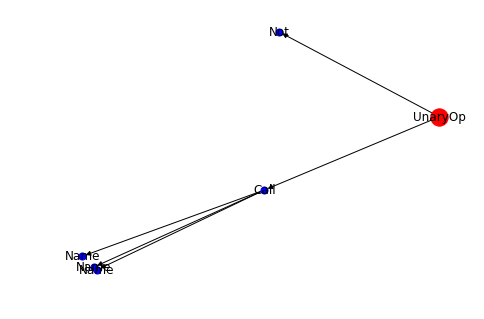

[49, 50, 51, 52, 53, 54]

In [57]:
draw_subtree(G, node_id=49)

In [42]:
snippets[0]

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [51]:
def draw_snippet(G, snippet):
    hub_ego = G.subgraph(snippet)
    # Draw graph
    pos = nx.spring_layout(hub_ego)

    neighbours = list(hub_ego.nodes())
    if len(neighbours) > 100:
        return
    labels = {}
    for n in neighbours:
        labels[n] = get_name_from_token(feats[n], show_id=False)

    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)
    # Draw ego as large and red
    #nx.draw_networkx_nodes(hub_ego, pos, nodelist=[node_id], node_size=300, node_color='r')
    plt.show()
    return neighbours

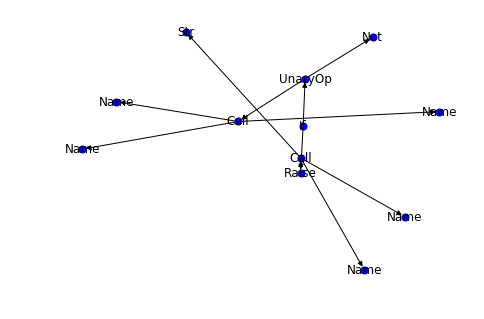

[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

In [52]:
draw_snippet(G, snippet=snippets[0])

### Context generation

In [37]:
import itertools

In [60]:
max_len = 64; nb_snippets = 7000; context_len = 5

voc = []; c = Counter(); total_len = 0
sequences = []

for j in range(nb_snippets):
    snippet = snippets[j]
    G_sub = G.subgraph(snippet).copy()
    row = []
    for t in snippet:
        tk = get_name_from_token(feats[t], show_id=False)
        row.append(tk)

        vk = var_map.get(str(t), None)
        if vk is not None:
            split = list(filter(None, vk.split('_')))
            if len(split) > 0:
                for e_in, e_out in itertools.permutations(split,2):
                    G_sub.add_edge(e_in+str(t), e_out+str(t))
                G_sub.add_edge(t,split[0]+str(t))
    
                for s in split:
                    row.append('#'+s)
    total_len += len(row)
    c.update(row)
    
    for i in range(context_len, len(row)):
        seq = row[i-context_len:i]
        if '#' in seq[-1]:
            sequences.append(seq)
            with open('seq_tk.txt', 'a') as f:
                f.write(' '.join(seq))
                f.write('\n')
            
    if len(row) < max_len:
        for r in row:
            if r not in voc:
                voc.append(r)


    


In [46]:
sequences

[['For', 'Name', '#layer', 'Attribute', '#input'],
 ['Name', '#layer', 'Attribute', '#input', '#layers'],
 ['#layers', 'Name', 'Assign', 'Name', '#input'],
 ['Name', 'Assign', 'Name', '#input', '#tensor'],
 ['Call', 'Name', 'keyword', 'Attribute', '#batch'],
 ['Name', 'keyword', 'Attribute', '#batch', '#input'],
 ['keyword', 'Attribute', '#batch', '#input', '#shape'],
 ['#shape', 'Name', 'keyword', 'Attribute', '#dtype'],
 ['#dtype', 'Name', 'keyword', 'Attribute', '#sparse'],
 ['#sparse', 'Name', 'keyword', 'Attribute', '#name'],
 ['Name', 'Expr', 'Call', 'Attribute', '#append'],
 ['Name', 'Name', 'Assign', 'Name', '#newly'],
 ['Name', 'Assign', 'Name', '#newly', '#created'],
 ['Assign', 'Name', '#newly', '#created', '#input'],
 ['Name', '#newly', '#created', '#input', '#layer'],
 ['#input', '#layer', 'Subscript', 'Attribute', '#keras'],
 ['#layer', 'Subscript', 'Attribute', '#keras', '#history'],
 ['Call', 'Name', 'keyword', 'Attribute', '#batch'],
 ['Name', 'keyword', 'Attribute', '

In [ ]:
if len(row) < max_len:
        for r in row:
            if r not in voc:
                voc.append(r)
                
        with open('split_lit_tk_pop.txt', 'a') as f:
            f.write(' '.join(row))
            f.write('\n\n')

        with open('split_lit_adj_pop.txt', 'a', newline='') as f:
            wr = csv.writer(f)
            G_u = G_sub.to_undirected()
            adj = nx.adj_matrix(G_u).todense()
            final = np.zeros((max_len,max_len), dtype=int)
            final[:adj.shape[0], :adj.shape[1]] = adj
            final += np.eye(max_len, dtype=int)

            for r in final.tolist():
                wr.writerow(r)
            wr.writerow([])
            wr.writerow([])


## Popularity baseline

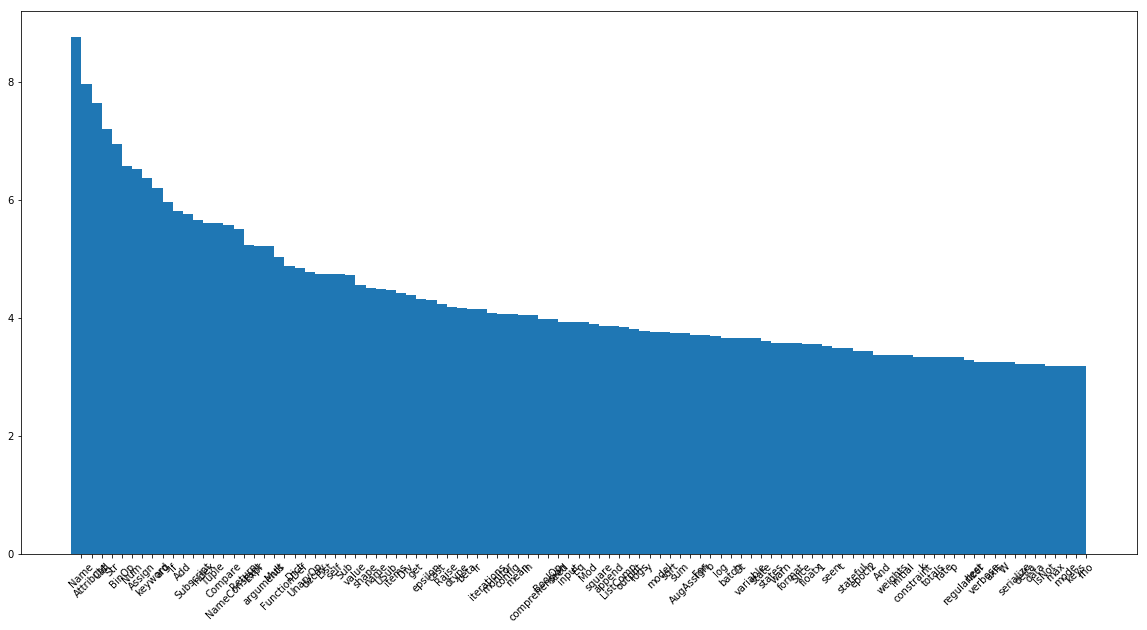

In [58]:
plt.figure(figsize=(20,10))
labels, values = zip(*c.most_common()[:100])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, np.log(values), width)
plt.xticks(indexes + width * 0.5, labels, rotation=45)
plt.show()

In [53]:
c.most_common()

[('Name', 6384),
 ('Attribute', 2869),
 ('Call', 2057),
 ('Str', 1333),
 ('BinOp', 1043),
 ('Num', 717),
 ('Assign', 680),
 ('keyword', 582),
 ('arg', 489),
 ('If', 389),
 ('Add', 331),
 ('Subscript', 319),
 ('Index', 288),
 ('Tuple', 270),
 ('Compare', 270),
 ('NameConstant', 261),
 ('Return', 246),
 ('Expr', 188),
 ('arguments', 185),
 ('Mult', 183),
 ('FunctionDef', 154),
 ('Dict', 132),
 ('UnaryOp', 127),
 ('decay', 119),
 ('List', 115),
 ('self', 115),
 ('Sub', 114),
 ('value', 113),
 ('shape', 95),
 ('name', 90),
 ('USub', 89),
 ('items', 88),
 ('Div', 83),
 ('get', 80),
 ('epsilon', 75),
 ('cast', 74),
 ('Raise', 69),
 ('dtype', 66),
 ('beta', 65),
 ('lr', 64),
 ('iterations', 64),
 ('monitor', 59),
 ('config', 58),
 ('mean', 58),
 ('In', 57),
 ('comprehension', 57),
 ('BoolOp', 54),
 ('seed', 54),
 ('input', 51),
 ('Eq', 51),
 ('Mod', 51),
 ('square', 49),
 ('append', 48),
 ('ListComp', 48),
 ('output', 47),
 ('logs', 45),
 ('y', 44),
 ('model', 43),
 ('sqrt', 43),
 ('sum', 42)

In [60]:
total_len

25768

In [68]:
pop_baseline =  max(c.items(), key=lambda x: x[1])[1]/total_len
pop_baseline

0.24774914622787955

In [247]:
for v in voc:
    print(v.lower())

if
unaryop
not
call
name
raise
str
for
layer
attribute
input
layers
assign
tensor
keyword
batch
shape
dtype
sparse
name
expr
append
newly
created
subscript
keras
history
index
num
tuple
original
cloned
binop
add
x
y
inputs
nameconstant
compare
notin
new
from
config
class
get
continue
in
call
mask
outputs
assert
functiondef
arguments
arg
return
noteq
is
origin
list
model
tensors
eq
softmax
gt
e
exp
sub
max
s
sum
div
mod
alpha
elu
scale
mult
value
threshold
relu
custom
objects
identifier
is
string
types
warn
format
true
pred
mean
equal
round
usub
cast
argmax
floatx
flatten
k
in
top
dict
self
callbacks
queue
length
boolop
or
listcomp
comprehension
c
params
callback
set
epoch
logs
on
end
delta
ts
begin
time
and
t
enter
train
validation
data
stateful
metrics
seen
totals
v
items
augassign
isnot
classdef
loss
isnan
isinf
stop
training
use
steps
verbose
epochs
target
progbar
lt
log
values
update
setdefault
filepath
monitor
save
best
only
weights
mode
period
startswith
op
greater
inf
less
min
p

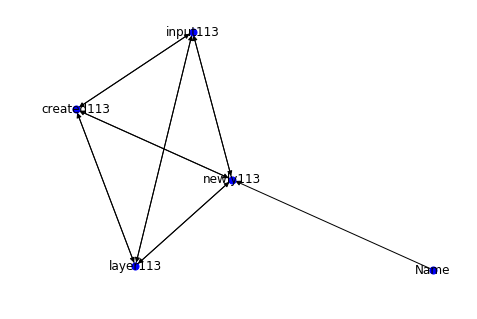

In [225]:
#hub_ego = dfs_tree(G_sub, 'batch96')
hub_ego = nx.ego_graph(G_sub, 113, radius=5)
pos = nx.spring_layout(hub_ego)
    
labels = {}
for neigh in hub_ego.nodes():
    if type(neigh) == int:
        labels[neigh] = get_name_from_token(feats[neigh], show_id=False)
    else:
        labels[neigh] = neigh

nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True, labels=labels)


### Average node degrees

In [49]:
import re
from scipy import io

In [57]:
suffix = "_adj"; adj_prefix = "sklearn_mlm_split_magret"
adj_files = "../magret/large-corpus/adj/"
ndeg=[]
adj_files_ = [f for f in os.listdir(adj_files) if re.match(r'.*_'+adj_prefix+suffix+'.mtx', f)]
adj_files_ = sorted(adj_files_, key = lambda x: (int(re.sub('\D','',x)),x))
for f in adj_files_:
    #print(adj_files, f, adj_prefix+suffix+'.mtx')
    m = io.mmread(os.path.join(adj_files, f))
    G = nx.from_scipy_sparse_matrix(m)
    ndeg.append(sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes()))

In [58]:
np.mean(ndeg)

4.605574537095352

4.665333333333334